<a href="https://colab.research.google.com/github/adharangaonkar/Image-Processing-and-Computer-Vision/blob/main/Digit_Recognition/Image_Recognition_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
from torch import nn
import torch.nn.functional as F

In [3]:
!pip3 install torchvision

In [4]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [5]:
transform= transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])
training_dataset = datasets.MNIST(root= './data', 
                                  train=True, download=True, transform= transform )

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
training_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [7]:
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size= 100, shuffle = 
                                            True)

In [8]:
def im_covert(tensor):   # to convert the tensor into numpy arrays
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  # print(image.shape)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5)) #d denormalize
  image = image.clip(0,1)
  return image

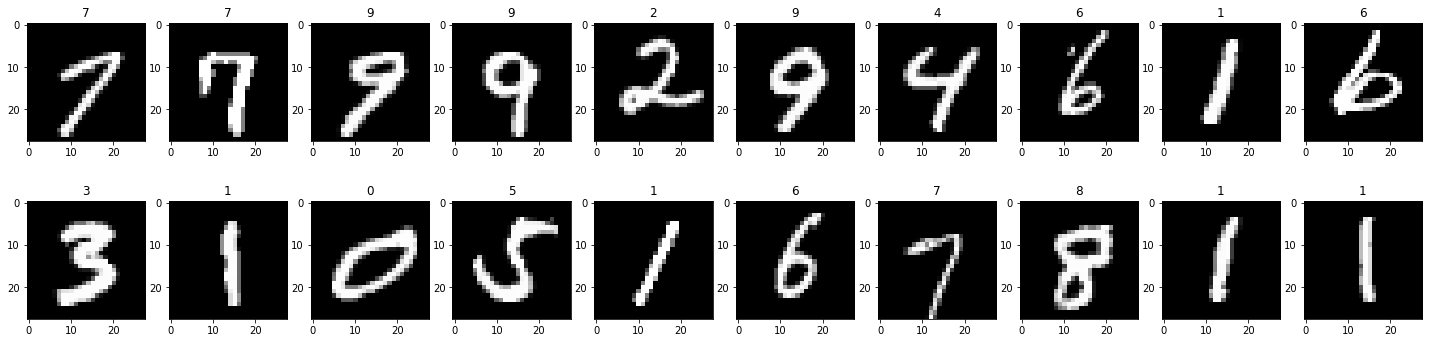

In [9]:
dataiter = iter(training_loader)
images, label = dataiter.next()
fig = plt.figure(figsize=(25,6))

for idx in range(20):
  ax = fig.add_subplot(2, 10, idx+1)
  plt.imshow(im_covert(images[idx]))
  ax.set_title(label[idx].item())

In [10]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)
  def forward(self, x):
    x = F.relu(self.linear1(x)) 
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x


In [11]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.0001)

In [13]:
images.shape

torch.Size([100, 1, 28, 28])

In [14]:
images.view(images.shape[0], -1).size()

torch.Size([100, 784])

In [15]:
epochs = 12
running_loss_history = []
running_corrects_history = []
for i in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  for inputs, labels in training_loader:
    # we will have to convert the image from size 1, 28,28 to a single row tensor 1, 784
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    print('Training Loss: {:.4f}, Training Accuracy{:.4f}'.format(epoch_loss, epoch_acc.item()))


Training Loss: 0.9320, Training Accuracy77.0983
Training Loss: 0.3754, Training Accuracy89.5317
Training Loss: 0.3177, Training Accuracy90.9050
Training Loss: 0.2851, Training Accuracy91.8217
Training Loss: 0.2585, Training Accuracy92.5200
Training Loss: 0.2335, Training Accuracy93.2683
Training Loss: 0.2129, Training Accuracy93.9350
Training Loss: 0.1954, Training Accuracy94.4633
Training Loss: 0.1792, Training Accuracy94.8983
Training Loss: 0.1663, Training Accuracy95.2483
Training Loss: 0.1545, Training Accuracy95.5183
Training Loss: 0.1445, Training Accuracy95.8567


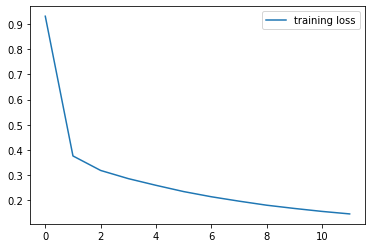

In [16]:
plt.plot(running_loss_history, label='training loss')
plt.legend()

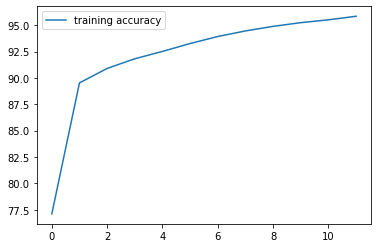

In [17]:
plt.plot(running_corrects_history, label='training accuracy')
plt.legend()